In [16]:
# .mp3
# .flac
# .wav

import wave
import pyaudio
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Audio signal parameters
# Number of audio channels (1 for mono, 2 for stereo)
# Number of bytes per sample - sample width
# Number of frames per second - frame rate/ samplerate
# Number of frames 
# values in each frame

sample_wave_file = "samp.wav"
audio = wave.open(sample_wave_file, "rb")

In [4]:
print("Number of audio channels: ", audio.getnchannels())
print("Number of bytes per sample: ", audio.getsampwidth())
print("Number of frames per second: ", audio.getframerate())
print("Number of frames: ", audio.getnframes())


Number of audio channels:  2
Number of bytes per sample:  2
Number of frames per second:  44100
Number of frames:  526073


In [5]:
audio.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=526073, comptype='NONE', compname='not compressed')

In [6]:
signal_wave = audio.readframes(-1)
t_audio = audio.getnframes() / audio.getframerate()
t_audio

11.929092970521541

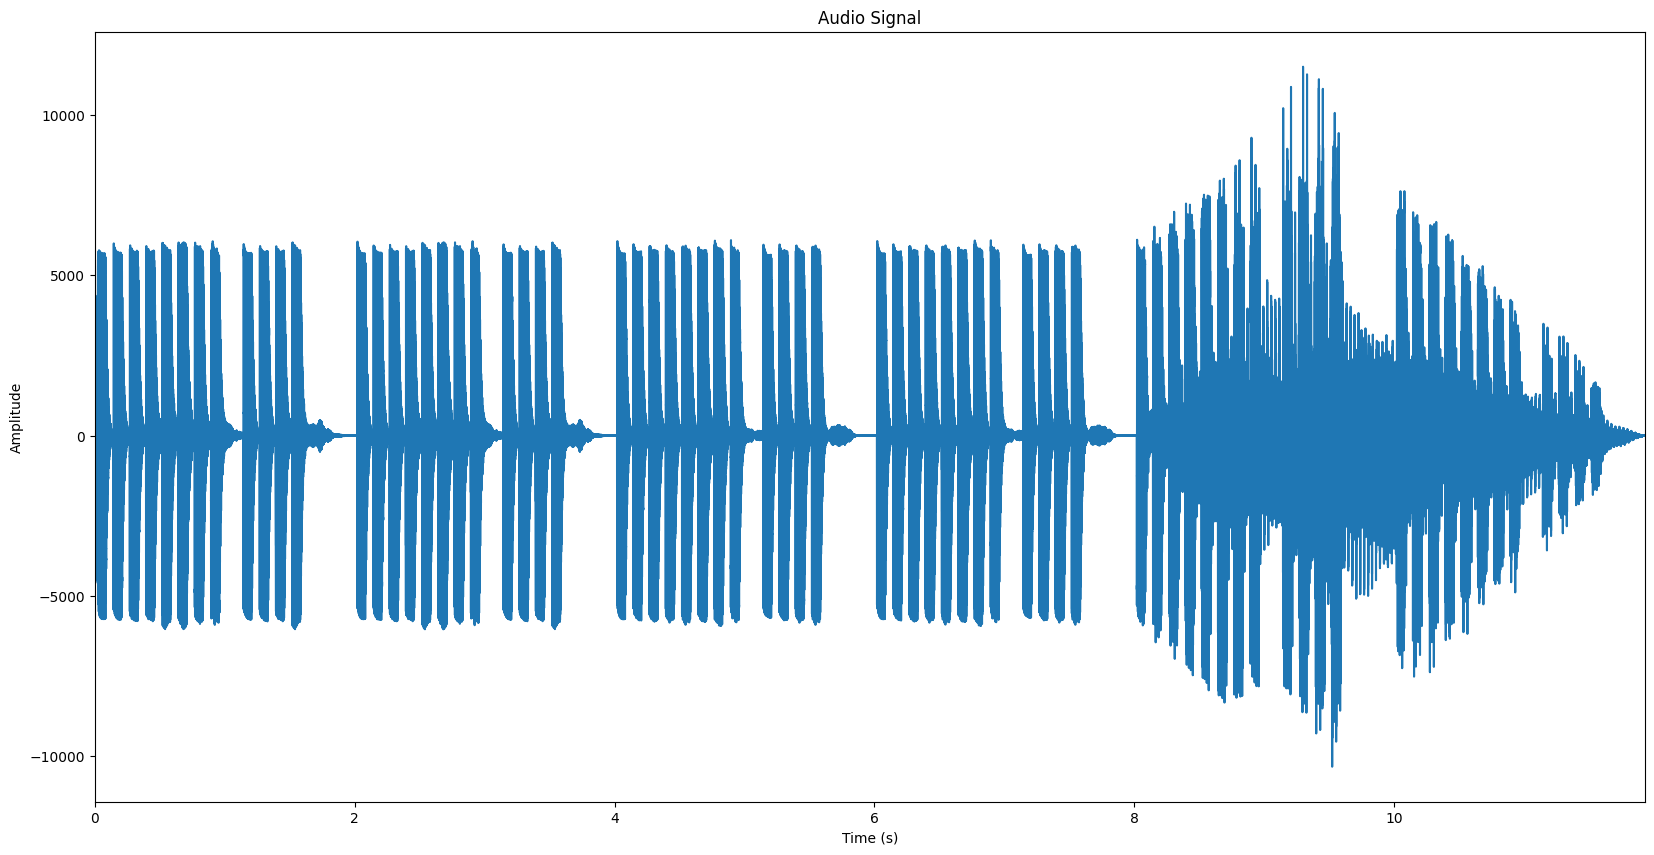

In [11]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
times = np.linspace(0, t_audio, num=signal_array.size)

plt.figure(figsize=(20, 10))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, t_audio)
plt.show()

In [18]:
# Recording audio
FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1 # mono audio
RATE = 44100 # samples per second

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

print("Recording started")
seconds = 5
frames = []
for _ in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)

print("Recording stopped")
stream.stop_stream()
stream.close()
p.terminate()

# Save the recorded audio
wf = wave.open("output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b"".join(frames))
wf.close()

Expression 'r' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2099
Expression 'PaAlsaStreamComponent_FinishConfigure( &self->capture, hwParamsCapture, inParams, self->primeBuffers, realSr, inputLatency )' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2733
Expression 'PaAlsaStream_Configure( stream, inputParameters, outputParameters, sampleRate, framesPerBuffer, &inputLatency, &outputLatency, &hostBufferSizeMode )' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2845


OSError: [Errno -9999] Unanticipated host error

In [19]:
%pip install pydub --break-system-packages

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
# for mp3 files use pydub
# for flac files use soundfile

from pydub import AudioSegment
from pydub.playback import play

audio = AudioSegment.from_wav("samp.wav")

audio = audio + 6 # increase volume by 6 dB
audio = audio * 2 # double the audio
audio = audio.fade_in(2000).fade_out(3000) # fade in and fade out
audio.export("output.mp3", format="mp3")

<_io.BufferedRandom name='output.mp3'>